Objective:

The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:

1. Download the wine dataset from the UCI Machine Learning Repository

   dataset link: https://archive.ics.uci.edu/ml/datasets/Wine

2. Load the dataset into a Pandas dataframe.

3. Split the dataset into features and target variables.

4. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

5. Implement PCA on the preprocessed dataset using the scikit-learn library.

6. Determine the optimal number of principal components to retain based on the explained variance ratio.

7. Visualise the results of PCA using a scatter plot.

8. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

9. Interpret the results of PCA and clustering analysis.

Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Download the Wine dataset from UCI Machine Learning Repository
data = load_wine()
wine_df = pd.DataFrame(data.data, columns=data.feature_names)
wine_df['target'] = data.target

In [3]:
# Step 2: Load the dataset into a Pandas dataframe
print(wine_df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [4]:
# Step 3: Data Preprocessing
X = wine_df.drop('target', axis=1)
y = wine_df['target']


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
# Step 4: Implement PCA using scikit-learn
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


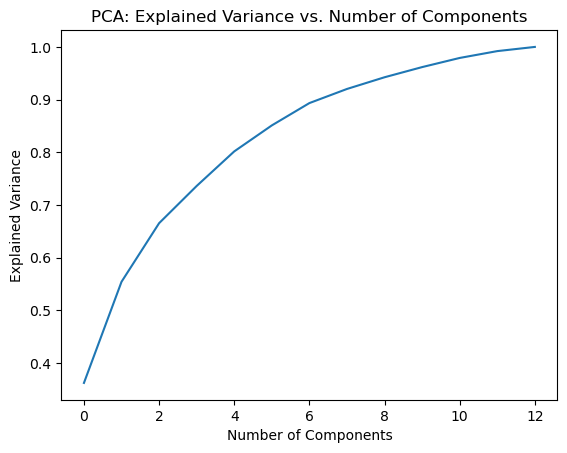

In [8]:
# Step 5: Determine the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.show()

# Based on the plot, determine the number of components to retain

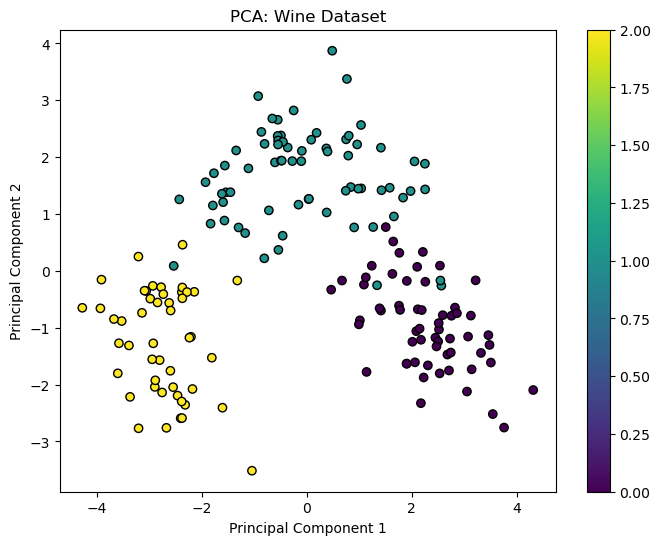

In [9]:
# Step 6: Visualize PCA results using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Wine Dataset')
plt.colorbar()
plt.show()


In [10]:
# Step 7: Perform clustering on the PCA-transformed data using K-Means
# Let's assume we found the optimal number of components to be 2
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca[:, :2])


In [11]:
# Step 8: Interpret the results
silhouette_avg = silhouette_score(X_pca[:, :2], y_kmeans)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5610505693103248
